In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(os.path.join('data', 'data.csv'))
df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
data = df[['difficulty'] + ['Q' + str(i) for i in range(1, 29)]]
data

,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,4,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
pca = PCA(n_components=0.9)
data_pca = pca.fit_transform(data)
data_pca.shape

(5820, 6)

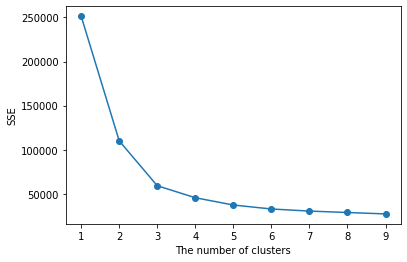

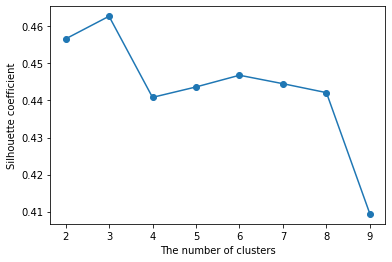

In [5]:
# 记录不同类数的轮廓系数结果
x_label_silhouette_score = []
y_label_silhouette_score = []
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


model = KMeans(n_clusters=1, init='random', n_init=10).fit(data_pca)
# clusterid, error, nfound = kcluster(X, 1, dist='e', method='a', transpose=0)
x_label_SSE = [1]
y_label_SSE = [model.inertia_]
for n_clusters in range(2, 10):
    # 采用基于余弦相似度的聚类
    
    model = KMeans(n_clusters=n_clusters, init='random', n_init=10).fit(data_pca)
    # 计算轮廓系数
    silhouette_avg = silhouette_score(data_pca, model.labels_, metric='euclidean')
    x_label_silhouette_score.append(n_clusters)
    y_label_silhouette_score.append(silhouette_avg)
    x_label_SSE.append(n_clusters)
    y_label_SSE.append(model.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(x_label_SSE, y_label_SSE, marker="o")
plt.xlabel("The number of clusters")
plt.ylabel("SSE")
plt.show()
plt.plot(x_label_silhouette_score, y_label_silhouette_score, marker="o")
plt.xlabel("The number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

In [9]:
model = KMeans(n_clusters=3, init='random', n_init=10).fit(data)
#y_km中保存了聚类的结果
import numpy as np
for i in set(list(model.labels_)):
    print(i, len(np.argwhere(model.labels_==i)))

0 1234
1 2363
2 2223


# TSNE可视化
## PCA初始化
### 二维

In [26]:
tsne_2=TSNE(n_components=2, metric='euclidean', init='pca')
X_tsne_2d = tsne_2.fit_transform(data_pca)

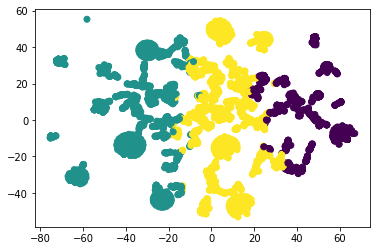

In [15]:
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=model.labels_)
plt.show()

### 三维

In [114]:
tsne_3=TSNE(n_components=3, metric='euclidean', init='pca')
X_tnse_3d = tsne_3.fit_transform(data_Q)

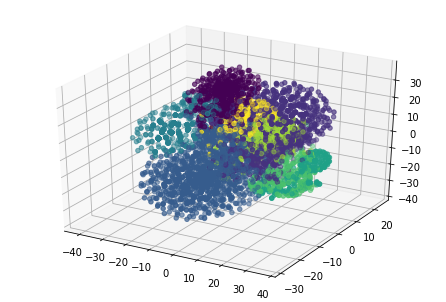

In [122]:
fig = plt.figure()
ax = Axes3D(fig)
t = ax.scatter(X_tnse_3d[:, 0] * -1, X_tnse_3d[:, 2], X_tnse_3d[:, 1], c=model.labels_)

plt.show()

In [10]:
def combine(a, b):
    return str(a) + '-' + str(b)

df['instr-class'] = list(map(lambda a, b: combine(a, b), df['instr'], df['class']))
df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,instr-class
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1-2
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3-13
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,4,5,5,5,5,5,3-13
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,3-13
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3-13


In [11]:
df_0 = df[model.labels_ == 0]
df_0

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,instr-class
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1-2
13,1,2,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1-2
14,1,2,1,2,3,1,1,1,1,1,...,3,3,3,2,2,1,1,1,1,1-2
16,1,2,1,3,4,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1-2
18,1,2,1,1,4,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5812,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3-13
5814,3,13,1,2,4,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,3-13
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3-13
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3-13


In [13]:
dict(df_0['instr-class'].value_counts())

{'3-13': 260,
 '3-3': 245,
 '3-5': 130,
 '3-9': 106,
 '2-6': 92,
 '1-10': 83,
 '2-11': 73,
 '3-8': 69,
 '3-4': 42,
 '2-1': 41,
 '1-7': 41,
 '1-2': 26,
 '2-13': 14,
 '3-12': 12}

In [14]:
df_1 = df[model.labels_ == 1]
df_1

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,instr-class
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
10,1,2,1,3,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
11,1,2,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,3,13,1,1,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3-13
5797,3,13,1,1,2,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3-13
5810,3,13,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3-13
5811,3,13,1,4,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3-13


In [15]:
dict(df_1['instr-class'].value_counts())

{'3-3': 373,
 '3-5': 287,
 '3-9': 274,
 '3-13': 269,
 '3-8': 238,
 '2-6': 204,
 '2-11': 193,
 '1-10': 132,
 '2-1': 115,
 '3-4': 104,
 '1-7': 82,
 '2-13': 44,
 '1-2': 33,
 '3-12': 15}

In [16]:
df_2 = df[model.labels_ == 2]
df_2

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,instr-class
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1-2
5,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1-2
6,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1-2
7,1,2,1,1,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1-2
8,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,3,13,2,0,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,3-13
5807,3,13,1,2,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,3-13
5809,3,13,1,0,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,3-13
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,4,5,5,5,5,5,3-13


In [17]:
dict(df_2['instr-class'].value_counts())

{'3-3': 286,
 '2-6': 262,
 '3-5': 239,
 '1-10': 233,
 '2-11': 218,
 '3-13': 213,
 '3-8': 193,
 '3-9': 191,
 '2-1': 147,
 '1-2': 81,
 '1-7': 64,
 '3-4': 41,
 '2-13': 41,
 '3-12': 14}

In [19]:
dict(df_1['instr-class'].value_counts())

{'3-3': 373,
 '3-5': 287,
 '3-9': 274,
 '3-13': 269,
 '3-8': 238,
 '2-6': 204,
 '2-11': 193,
 '1-10': 132,
 '2-1': 115,
 '3-4': 104,
 '1-7': 82,
 '2-13': 44,
 '1-2': 33,
 '3-12': 15}

In [20]:
dict(df_0['instr-class'].value_counts())

{'3-13': 260,
 '3-3': 245,
 '3-5': 130,
 '3-9': 106,
 '2-6': 92,
 '1-10': 83,
 '2-11': 73,
 '3-8': 69,
 '3-4': 42,
 '2-1': 41,
 '1-7': 41,
 '1-2': 26,
 '2-13': 14,
 '3-12': 12}

In [21]:
dict(df['instr-class'].value_counts())

{'3-3': 904,
 '3-13': 742,
 '3-5': 656,
 '3-9': 571,
 '2-6': 558,
 '3-8': 500,
 '2-11': 484,
 '1-10': 448,
 '2-1': 303,
 '3-4': 187,
 '1-7': 187,
 '1-2': 140,
 '2-13': 99,
 '3-12': 41}

In [24]:
[[a] + [dict(df[model.labels_ == i]['instr-class'].value_counts())[a] / b for i in range(3)] for a, b in dict(df['instr-class'].value_counts()).items()]

[['3-3', 0.27101769911504425, 0.41261061946902655, 0.3163716814159292],
 ['3-13', 0.3504043126684636, 0.36253369272237196, 0.28706199460916443],
 ['3-5', 0.19817073170731708, 0.4375, 0.3643292682926829],
 ['3-9', 0.18563922942206654, 0.4798598949211909, 0.3345008756567426],
 ['2-6', 0.16487455197132617, 0.3655913978494624, 0.46953405017921146],
 ['3-8', 0.138, 0.476, 0.386],
 ['2-11', 0.15082644628099173, 0.3987603305785124, 0.45041322314049587],
 ['1-10', 0.18526785714285715, 0.29464285714285715, 0.5200892857142857],
 ['2-1', 0.1353135313531353, 0.3795379537953795, 0.48514851485148514],
 ['3-4', 0.22459893048128343, 0.5561497326203209, 0.2192513368983957],
 ['1-7', 0.2192513368983957, 0.4385026737967914, 0.3422459893048128],
 ['1-2', 0.18571428571428572, 0.2357142857142857, 0.5785714285714286],
 ['2-13', 0.1414141414141414, 0.4444444444444444, 0.41414141414141414],
 ['3-12', 0.2926829268292683, 0.36585365853658536, 0.34146341463414637]]

In [25]:
[[a] + [dict(df[model.labels_ == i]['instr'].value_counts())[a] / b for i in range(3)] for a, b in dict(df['instr'].value_counts()).items()]

[[3, 0.23993335184670925, 0.4332129963898917, 0.32685365176339903],
 [2, 0.1523545706371191, 0.3850415512465374, 0.4626038781163435],
 [1, 0.1935483870967742, 0.31870967741935485, 0.48774193548387096]]

In [28]:
np.mean(np.array(data[model.labels_ == 0]), axis=0)

array([2.50810373, 1.39384117, 1.40113452, 1.50648298, 1.43435981,
       1.38816856, 1.4076175 , 1.39303079, 1.37763371, 1.5       ,
       1.36790924, 1.46677472, 1.37925446, 1.41572123, 1.44489465,
       1.46353323, 1.3541329 , 1.61669368, 1.39708266, 1.42706645,
       1.42058347, 1.45948136, 1.47730956, 1.39059968, 1.38411669,
       1.49270665, 1.42706645, 1.40194489, 1.48703404])

In [29]:
np.mean(np.array(data[model.labels_ == 1]), axis=0)

array([2.89674143, 2.63055438, 2.82945408, 3.00211595, 2.84765129,
       2.86669488, 2.89547186, 2.81294964, 2.78501904, 2.96487516,
       2.83368599, 2.99788405, 2.78290309, 3.11468472, 3.19805332,
       3.18705036, 2.98180279, 3.37071519, 3.07829031, 3.13965298,
       3.19297503, 3.22175201, 3.22598392, 3.02962336, 2.9767245 ,
       3.22132882, 3.07278883, 2.98180279, 3.22259839])

In [31]:
np.mean(np.array(data[model.labels_ == 2]), axis=0)

array([2.81601439, 4.10076473, 4.26225821, 4.29464687, 4.24696356,
       4.31354026, 4.27620333, 4.26450742, 4.2388664 , 4.30454341,
       4.3202879 , 4.33468286, 4.22357175, 4.39316239, 4.41430499,
       4.40620783, 4.37696806, 4.41700405, 4.38911381, 4.40980657,
       4.41880342, 4.42420153, 4.43634728, 4.39046334, 4.35852452,
       4.4197031 , 4.3774179 , 4.31174089, 4.40980657])

In [39]:
new_pd = pd.DataFrame([[a] + [dict(df[model.labels_ == i]['instr'].value_counts())[a] / b for i in range(3)] for a, b in dict(df['instr'].value_counts()).items()])
new_pd.columns = ['instr', 'clsuter0', 'cluster1', 'cluster2']
new_pd

,instr,clsuter0,cluster1,cluster2
0,3,0.239933,0.433213,0.326854
1,2,0.152355,0.385042,0.462604
2,1,0.193548,0.318710,0.487742


In [40]:
new_pd = pd.DataFrame([[a] + [dict(df[model.labels_ == i]['instr-class'].value_counts())[a] / b for i in range(3)] for a, b in dict(df['instr-class'].value_counts()).items()])
new_pd.columns = ['instr-class', 'clsuter0', 'cluster1', 'cluster2']
new_pd

,instr-class,clsuter0,cluster1,cluster2
0,3-3,0.271018,0.412611,0.316372
1,3-13,0.350404,0.362534,0.287062
2,3-5,0.198171,0.437500,0.364329
3,3-9,0.185639,0.479860,0.334501
4,2-6,0.164875,0.365591,0.469534
5,3-8,0.138000,0.476000,0.386000
6,2-11,0.150826,0.398760,0.450413
7,1-10,0.185268,0.294643,0.520089
8,2-1,0.135314,0.379538,0.485149
9,3-4,0.224599,0.556150,0.219251
